In [1]:
library(Seurat)
library(ggplot2)
library(stringr)
library(ggpubr)
library(viridis)
library(dplyr)
library(reshape2)
library(ggbeeswarm)
library(ggrastr)
library(RColorBrewer)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.1 but the current version is
4.3.2; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: viridisLite


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
Axis_themes <- theme(plot.title = element_text(size = 8,hjust=0.5),
                     axis.title = element_text(size = 8),
                     axis.text = element_text(size = 8,color='black'),
                     axis.text.x = element_text(size = 8),                     
                     legend.text = element_text(size = 8),
                     legend.title = element_text(size = 8),
                     strip.text.x = element_text(size = 8),
                     strip.background = element_rect(fill=NA,linewidth=.355),
                     axis.line = element_line(linewidth = .355),
                     axis.ticks = element_line(linewidth = .177))
UMAP_theme <- theme_bw()+theme(axis.text.y = element_blank(),
                               axis.text.x = element_blank(),
                               axis.ticks.x= element_blank(),
                               axis.ticks.y= element_blank(),
                               axis.title.x= element_blank(),
                               axis.title.y= element_blank(),
                               strip.text.x = element_text(size = 8),
                               panel.grid.major = element_blank(),
                               panel.grid.minor = element_blank(),
                               panel.border = element_blank(),
                               panel.background = element_rect(colour = "black", fill = NA,linewidth=.355),
                               legend.position = "none",
                               plot.title = element_text(hjust = 0.5, size = 8))

In [3]:
jz.checkgenes = function(srat,gene){
    genes = rownames(srat)
    return(genes[startsWith(genes,gene)])
}

In [4]:
jz.save.umap.coord <- function(object) {
    # saves the UMAP embedding to the metadata 
    umapCoord <- as.data.frame(Embeddings(object = object[["umap"]]))
    object@meta.data$UMAP1 = umapCoord$umap_1
    object@meta.data$UMAP2 = umapCoord$umap_2
    if ('UMAP_1' %in% colnames(umapCoord)) {
        object@meta.data$UMAP1 = umapCoord$UMAP_1
        object@meta.data$UMAP2 = umapCoord$UMAP_2        
    }
    return(object)
}

In [5]:
# Read in matrix 
inf_dataset_1 <- Read10X(data.dir = 'Infection Cohort/Set_1/outs/per_sample_outs/multi_SpikeMemoryBCells/count/sample_feature_bc_matrix/')
inf_dataset_2 <- Read10X(data.dir = 'Infection Cohort/Set_2/outs/per_sample_outs/multi_exp035_MemBSecondExp211127/count/sample_feature_bc_matrix/')
inf_dataset_3 <- Read10X(data.dir = 'Infection Cohort/Set_3/outs/per_sample_outs/multi_exp035_3/count/sample_feature_bc_matrix/')
inf_dataset_4 <- Read10X(data.dir = 'Infection Cohort/Set_4/outs/per_sample_outs/multi_exp035_4/count/sample_feature_bc_matrix/')

tons_dataset_1 = Read10X(data.dir = 'Tonsil Cohort/Set 1/outs/per_sample_outs/multi_exp035_revision_2_S1/count/sample_feature_bc_matrix/')
tons_dataset_2 = Read10X(data.dir = 'Tonsil Cohort/Set 2/outs/per_sample_outs/multi_exp035_revision_2_S2/count/sample_feature_bc_matrix/')

vax_dataset = Read10X(data.dir = 'Vaccination Cohort/Set 1/outs/per_sample_outs/multi_exp035_5_vacc_prj/count/sample_feature_bc_matrix/')

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.



In [6]:
# Create Seurat objects 
inf.1 <- CreateSeuratObject(counts = inf_dataset_1$`Gene Expression`,project='Infection_1')
inf.2 <- CreateSeuratObject(counts = inf_dataset_2$`Gene Expression`,project='Infection_2')
inf.3 <- CreateSeuratObject(counts = inf_dataset_3$`Gene Expression`,project='Infection_3')
inf.4 <- CreateSeuratObject(counts = inf_dataset_4$`Gene Expression`,project='Infection_4')

tons.1 <- CreateSeuratObject(counts = tons_dataset_1$`Gene Expression`,project='Tonsil_1')
tons.2 <- CreateSeuratObject(counts = tons_dataset_2$`Gene Expression`,project='Tonsil_2')

vax <- CreateSeuratObject(counts = vax_dataset$`Gene Expression`,project='Vaccine')


In [7]:
# Create hash assay objects 
hash.inf.1 = CreateAssayObject(counts = inf_dataset_1$`Antibody Capture`[c(1:8),])
hash.inf.2 = CreateAssayObject(counts = inf_dataset_2$`Antibody Capture`[c(1:8),])
hash.inf.3 = CreateAssayObject(counts = inf_dataset_3$`Antibody Capture`[c(1:8),])
hash.inf.4 = CreateAssayObject(counts = inf_dataset_4$`Antibody Capture`[c(1:8),])

hash.tons.1 = CreateAssayObject(counts = tons_dataset_1$`Antibody Capture`[c(1:8),])
hash.tons.2 = CreateAssayObject(counts = tons_dataset_2$`Antibody Capture`[c(1:8),])

hash.vax = CreateAssayObject(counts = vax_dataset$`Antibody Capture`[c(1:8),])

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with da

In [8]:
# add hashing to seurat 
inf.1[["Hashing"]] <- hash.inf.1
inf.2[["Hashing"]] <- hash.inf.2
inf.3[["Hashing"]] <- hash.inf.3
inf.4[["Hashing"]] <- hash.inf.4

tons.1[["Hashing"]] <- hash.tons.1
tons.2[["Hashing"]] <- hash.tons.2

vax[["Hashing"]] <- hash.vax


In [9]:
# Demultiplexing the HTO data
inf.1 <- NormalizeData(inf.1, assay = "Hashing", normalization.method = "CLR", margin = 2)
inf.2 <- NormalizeData(inf.2, assay = "Hashing", normalization.method = "CLR", margin = 2)
inf.3 <- NormalizeData(inf.3, assay = "Hashing", normalization.method = "CLR", margin = 2)
inf.4 <- NormalizeData(inf.4, assay = "Hashing", normalization.method = "CLR", margin = 2)

tons.1 <- NormalizeData(tons.1, assay = "Hashing", normalization.method = "CLR", margin = 2)
tons.2 <- NormalizeData(tons.2, assay = "Hashing", normalization.method = "CLR", margin = 2)

vax <- NormalizeData(vax, assay = "Hashing", normalization.method = "CLR", margin = 2)


inf.1 <- HTODemux(inf.1, assay = "Hashing", positive.quantile = 0.99)
inf.2 <- HTODemux(inf.2, assay = "Hashing", positive.quantile = 0.99)
inf.3 <- HTODemux(inf.3, assay = "Hashing", positive.quantile = 0.99)
inf.4 <- HTODemux(inf.4, assay = "Hashing", positive.quantile = 0.99)

tons.1 <- HTODemux(tons.1, assay = "Hashing", positive.quantile = 0.99)
tons.2 <- HTODemux(tons.2, assay = "Hashing", positive.quantile = 0.99)

vax <- HTODemux(vax, assay = "Hashing", positive.quantile = 0.99)


Normalizing across cells

Normalizing across cells

Normalizing across cells

Normalizing across cells

Normalizing across cells

Normalizing across cells

Normalizing across cells

As of Seurat v5, we recommend using AggregateExpression to perform pseudo-bulk analysis.
This message is displayed once per session.
First group.by variable `ident` starts with a number, appending `g` to ensure valid variable names
This message is displayed once every 8 hours.
Cutoff for wt-Spike : 18 reads

Cutoff for B.1.351 : 7 reads

Cutoff for B.1.617.2 : 6 reads

Cutoff for RBD : 241 reads

Cutoff for FcRL5 : 242 reads

Cutoff for CD21 : 950 reads

Cutoff for CD27.1 : 24 reads

Cutoff for CXCR5.1 : 106 reads

Cutoff for PFCL1-196878-1691-2 : 263 reads

Cutoff for PFCL1-196878-1691-3 : 64 reads

Cutoff for PFCL1-154583-1943-2 : 169 reads

Cutoff for PFCL1-154583-1943-3 : 183 reads

Cutoff for PFCL1-179308-1988-2 : 53 reads

Cutoff for PFCL1-179308-1988-3 : 49 reads

Cutoff for PFCL1-LIM828246-2 : 33 re

In [10]:
# QC and selecting cells for further analysis 
inf.1[["percent.mt"]] <- PercentageFeatureSet(inf.1, pattern = "^MT-")
inf.2[["percent.mt"]] <- PercentageFeatureSet(inf.2, pattern = "^MT-")
inf.3[["percent.mt"]] <- PercentageFeatureSet(inf.3, pattern = "^MT-")
inf.4[["percent.mt"]] <- PercentageFeatureSet(inf.4, pattern = "^MT-")

tons.1[["percent.mt"]] <- PercentageFeatureSet(tons.1, pattern = "^MT-")
tons.2[["percent.mt"]] <- PercentageFeatureSet(tons.2, pattern = "^MT-")

vax[["percent.mt"]] <- PercentageFeatureSet(vax, pattern = "^MT-")

# original paper used 200, 2500 (infec) 4000 (tons, vax), 10% mito
inf.1 <- subset(inf.1, subset = nFeature_RNA > 300 & nFeature_RNA < 4000 & percent.mt < 10 & Hashing_classification.global=="Singlet")
inf.2 <- subset(inf.2, subset = nFeature_RNA > 300 & nFeature_RNA < 4000 & percent.mt < 10 & Hashing_classification.global=="Singlet")
inf.3 <- subset(inf.3, subset = nFeature_RNA > 300 & nFeature_RNA < 4000 & percent.mt < 10 & Hashing_classification.global=="Singlet")
inf.4 <- subset(inf.4, subset = nFeature_RNA > 300 & nFeature_RNA < 4000 & percent.mt < 10 & Hashing_classification.global=="Singlet")

tons.1 <- subset(tons.1, subset = nFeature_RNA > 300 & nFeature_RNA < 4000 & percent.mt < 10 & Hashing_classification.global=="Singlet")
tons.2 <- subset(tons.2, subset = nFeature_RNA > 300 & nFeature_RNA < 4000 & percent.mt < 10 & Hashing_classification.global=="Singlet")

vax <- subset(vax, subset = nFeature_RNA > 300 & nFeature_RNA < 4000 & percent.mt < 10 & Hashing_classification.global=="Singlet")

In [11]:
# merge 
gex <- merge(inf.1, y = c(inf.2, inf.3, inf.4, tons.1, tons.2, vax), 
             add.cell.ids = c("inf1", "inf2", "inf3",'inf4','tons1','tons2','vax'))
gex$cell_id = rownames(gex@meta.data)

In [12]:
table(gex$orig.ident)


Infection_1 Infection_2 Infection_3 Infection_4    Tonsil_1    Tonsil_2 
       1112        1439        2259        3974        3090        3075 
    Vaccine 
       4763 

In [13]:
gex

An object of class Seurat 
36638 features across 19712 samples within 2 assays 
Active assay: RNA (36601 features, 0 variable features)
 7 layers present: counts.Infection_1, counts.Infection_2, counts.Infection_3, counts.Infection_4, counts.Tonsil_1, counts.Tonsil_2, counts.Vaccine
 1 other assay present: Hashing

In [27]:
gex <- NormalizeData(gex,verbose = FALSE)
gex <- FindVariableFeatures(gex, selection.method = "vst", nfeatures = 2000, verbose = FALSE)
gex <- ScaleData(gex,vars.to.regress = c('nFeature_RNA','percent.mt'), verbose = FALSE)
gex <- RunPCA(gex, verbose = FALSE)
gex <- FindNeighbors(gex, dims = 1:15, verbose = FALSE)
gex <- FindClusters(gex, resolution = c(0.1,0.3,0.5,0.6), verbose = FALSE)
gex <- RunUMAP(gex, dims = 1:15, verbose = FALSE)
gex = jz.save.umap.coord(gex)

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -2.857”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.30103”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.5485e-14”
Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


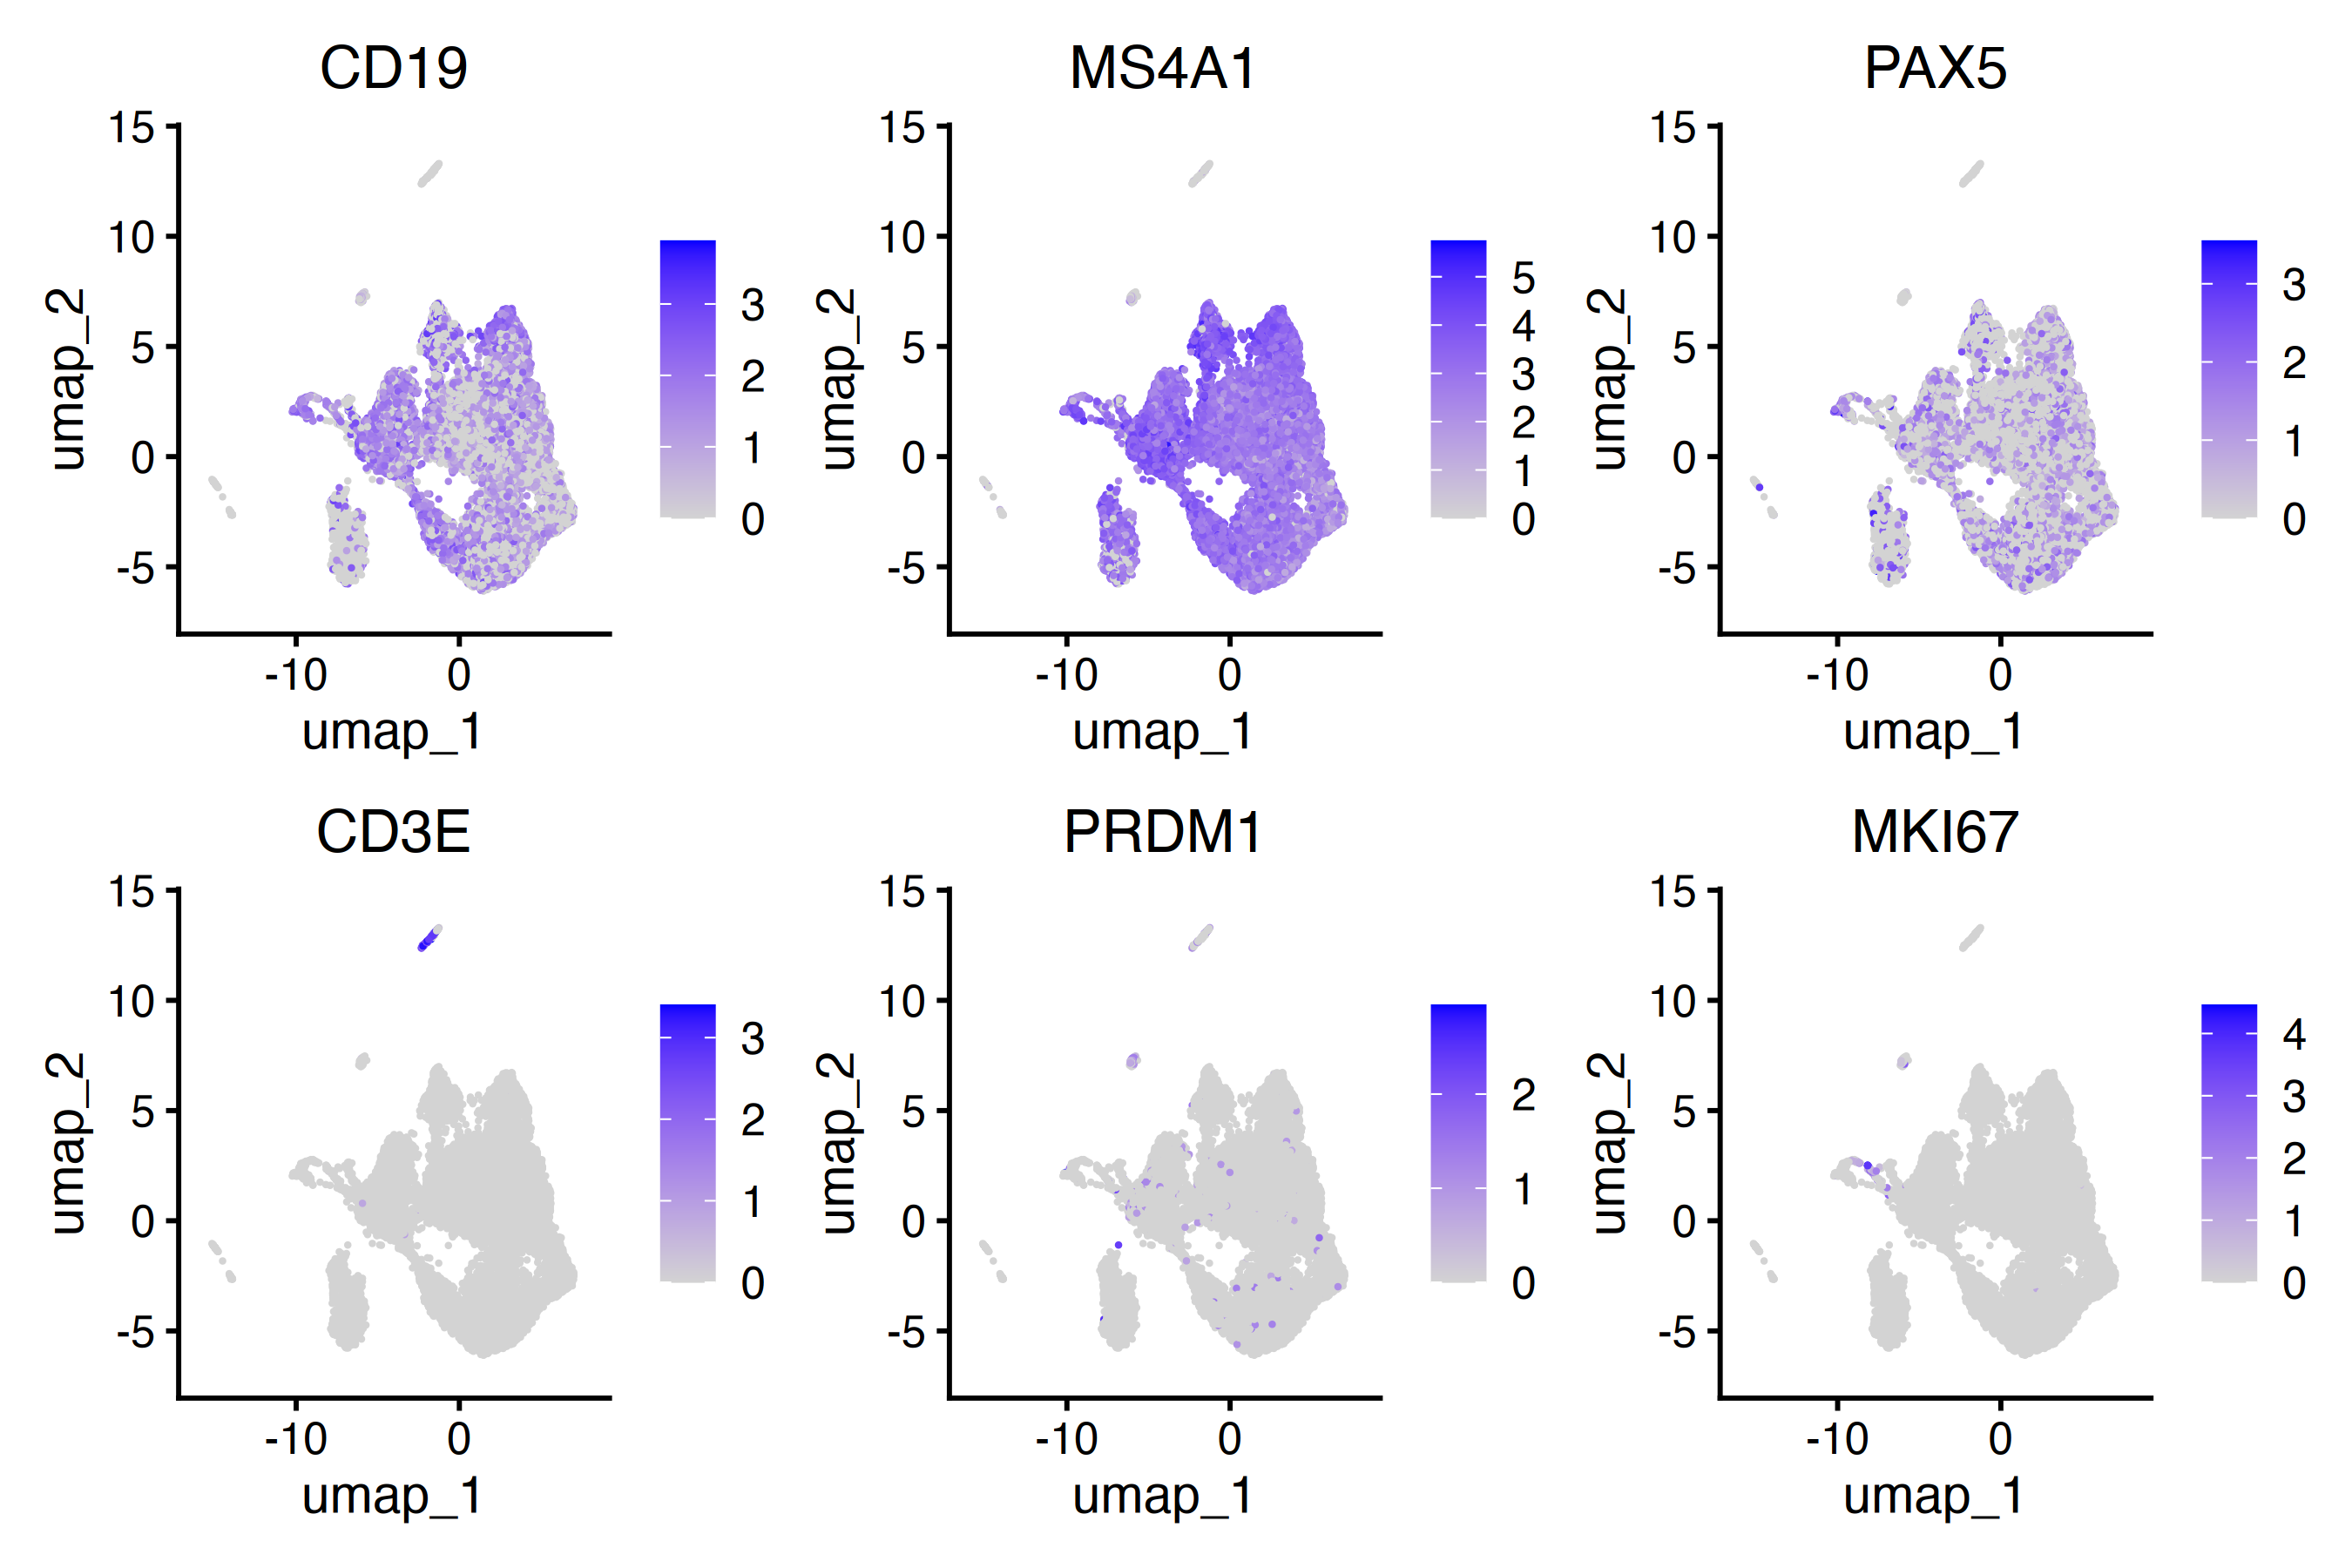

In [59]:
options(repr.plot.width=9,repr.plot.height=6)
FeaturePlot(gex,c('CD19','MS4A1','PAX5','CD3E','PRDM1','MKI67'),ncol=3)

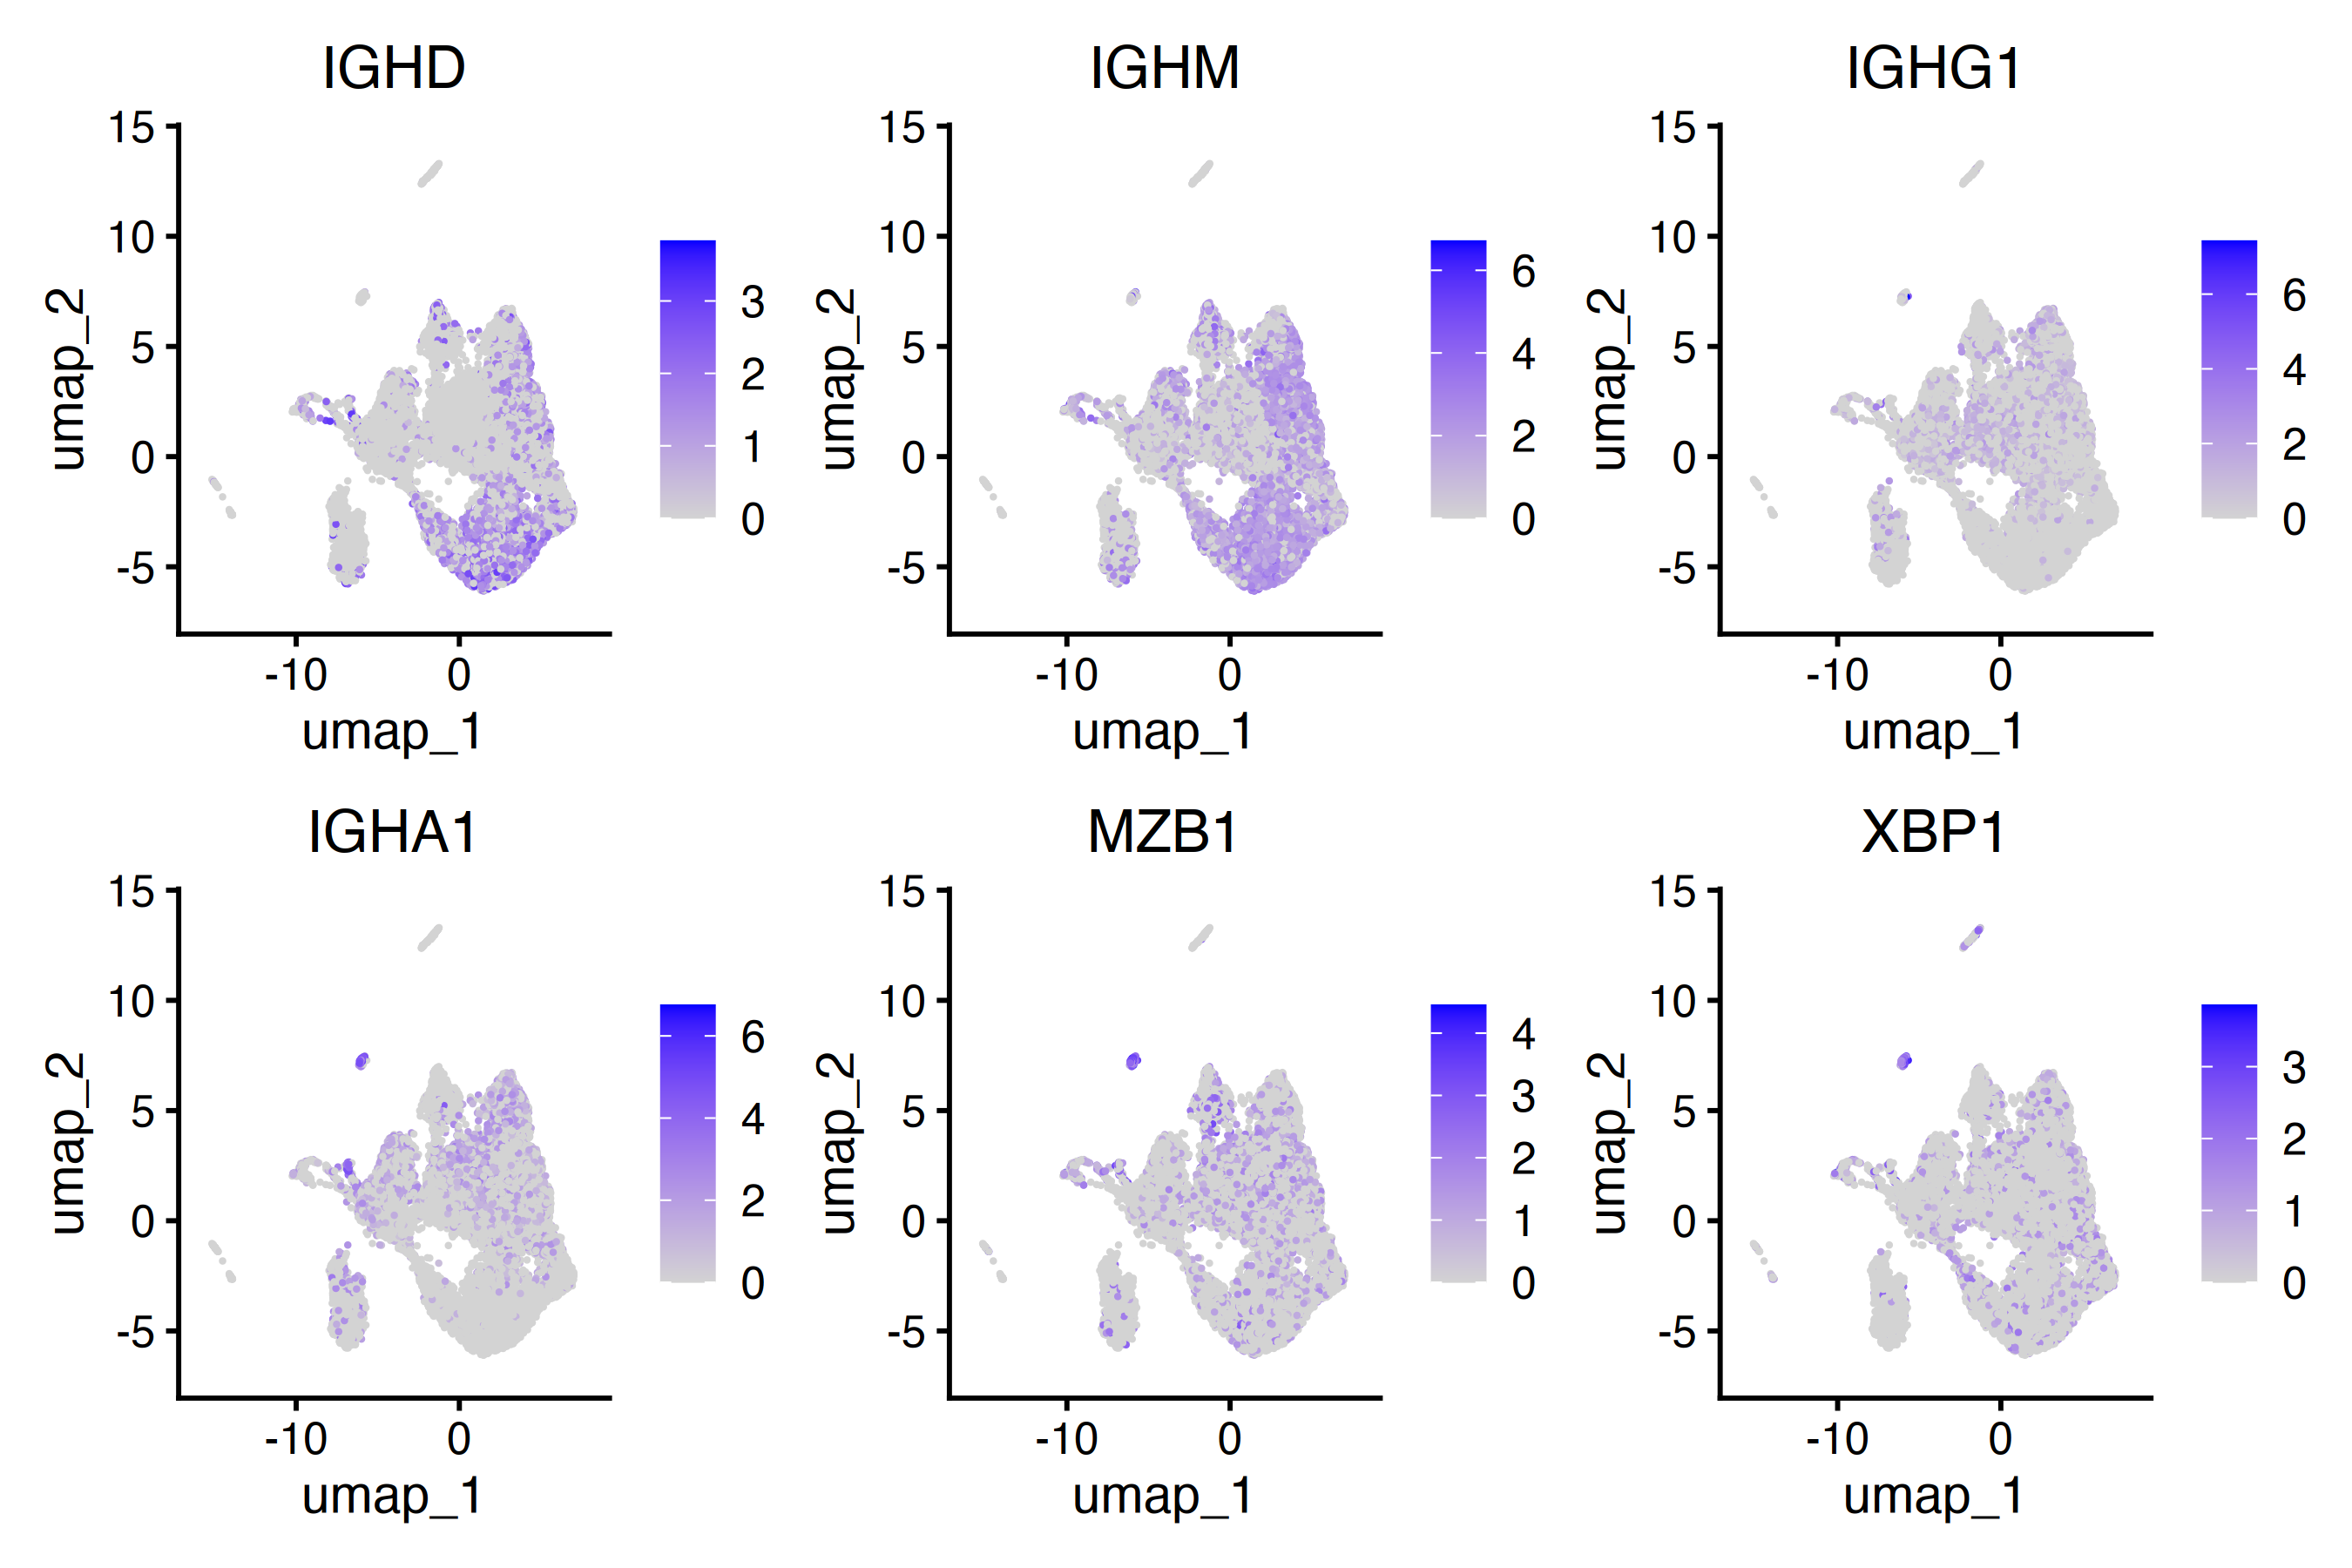

In [60]:
options(repr.plot.width=9,repr.plot.height=6)
FeaturePlot(gex,c('IGHD','IGHM','IGHG1','IGHA1','MZB1','XBP1'),ncol=3)

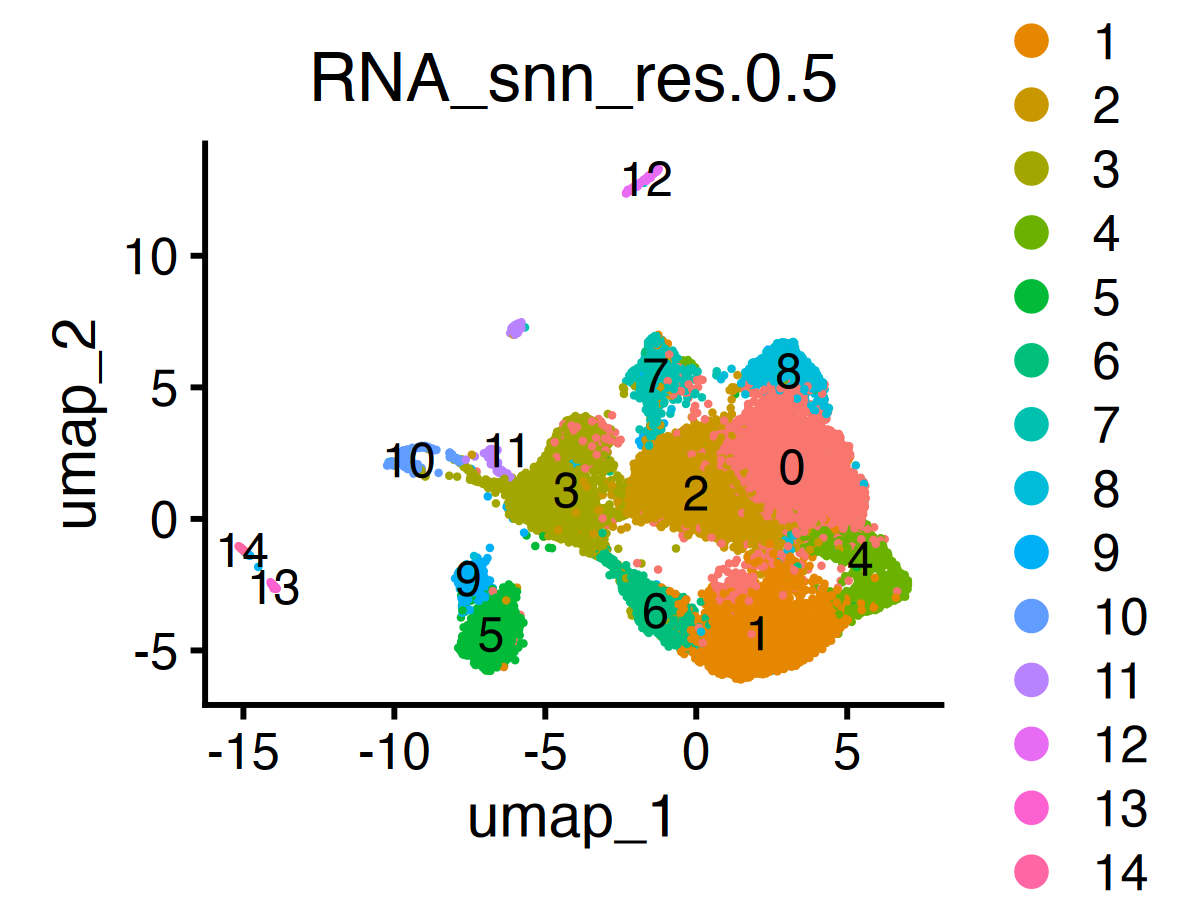

In [62]:
options(repr.plot.width=4,repr.plot.height=3,repr.plot.res=300)
DimPlot(gex,group.by='RNA_snn_res.0.5',label=TRUE) #+ NoLegend() 

In [63]:
gex1=gex
gex1[["RNA"]] <- JoinLayers(gex1[["RNA"]])

In [77]:
Idents(gex1) = 'RNA_snn_res.0.5'
df = FindMarkers(gex1,c(4))
# 7 
# 10 GC
# 11 PB
# 12 (T), 13&14(myeloid) 

In [79]:
#df %>% filter(avg_log2FC>0) %>% arrange(desc(pct.1-pct.2)) %>% head(40)

In [80]:
gex$cell.type = as.character(gex$RNA_snn_res.0.5)
gex$cell.type[gex$cell.type %in% c(1,6,0)] = 'Naive-like'
gex$cell.type[gex$cell.type %in% c(4,2,3,7,8,5,9)] = 'MBC-like'
gex$cell.type[gex$cell.type %in% c(11)] = 'PB'
gex$cell.type[gex$cell.type %in% c(10)] = 'GC'
gex$cell.type[gex$cell.type %in% c(12,13,14)] = 'Non-B cell'

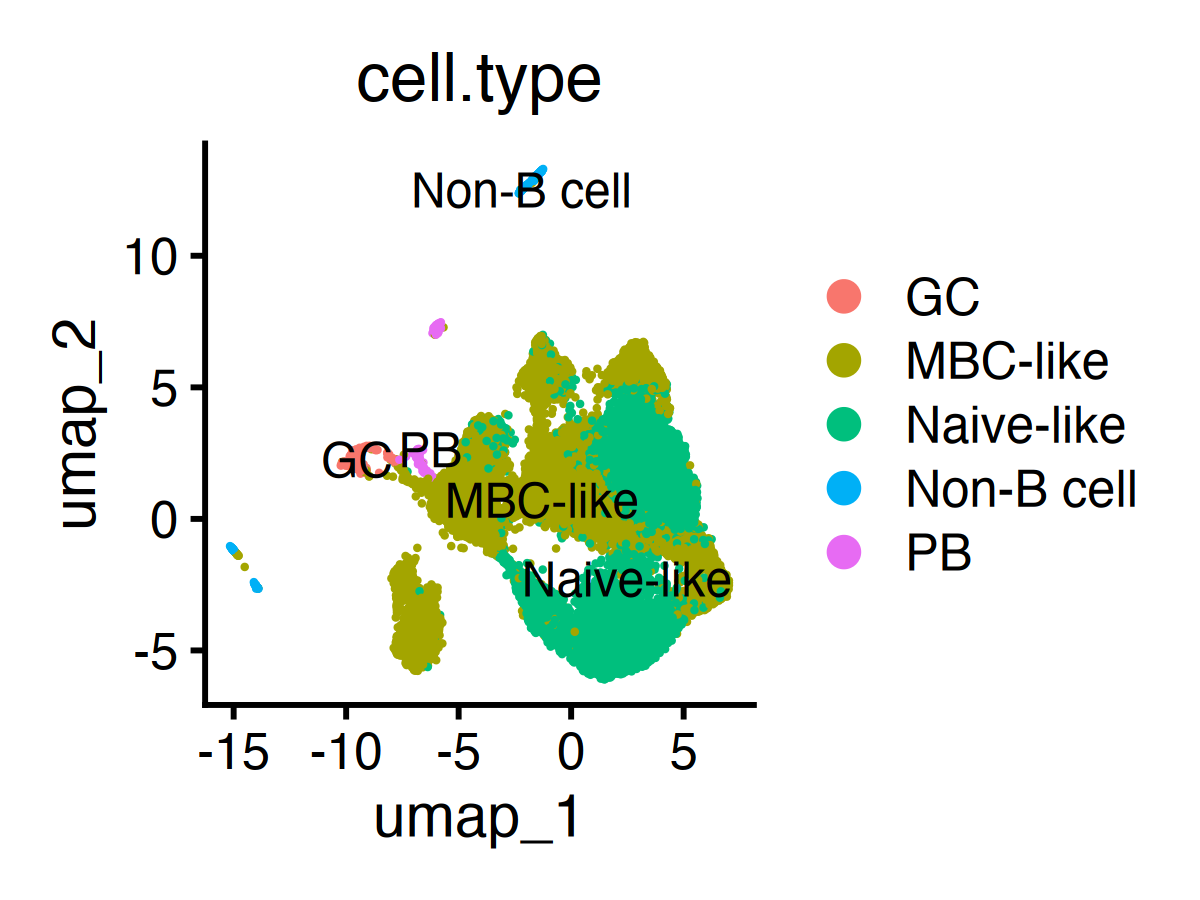

In [81]:
options(repr.plot.width=4,repr.plot.height=3,repr.plot.res=300)
DimPlot(gex,group.by='cell.type',label=TRUE) 

In [82]:
saveRDS(gex,'zurbuchen_etal_combined_300.RDS')

In [ ]:
gex = readRDS('zurbuchen_etal_combined.RDS')
gex

In [8]:
# read in VDJ files 
vdj.inf.1 = read.csv('Infection Cohort/Set_1/outs/per_sample_outs/multi_SpikeMemoryBCells/vdj_b/airr_rearrangement.tsv',sep='\t')
vdj.inf.2 = read.csv('Infection Cohort/Set_2/outs/per_sample_outs/multi_exp035_MemBSecondExp211127/vdj_b/airr_rearrangement.tsv',sep='\t')
vdj.inf.3 = read.csv('Infection Cohort/Set_3/outs/per_sample_outs/multi_exp035_3/vdj_b/airr_rearrangement.tsv',sep='\t')
vdj.inf.4 = read.csv('Infection Cohort/Set_4/outs/per_sample_outs/multi_exp035_4/vdj_b/airr_rearrangement.tsv',sep='\t')

vdj.tons.1 = read.csv('Tonsil Cohort/Set 1/outs/per_sample_outs/multi_exp035_revision_2_S1/vdj_b/airr_rearrangement.tsv',sep='\t')
vdj.tons.2 = read.csv('Tonsil Cohort/Set 2/outs/per_sample_outs/multi_exp035_revision_2_S2/vdj_b/airr_rearrangement.tsv',sep='\t')

vdj.vax = read.csv('Vaccination Cohort/Set 1/outs/per_sample_outs/multi_exp035_5_vacc_prj/vdj_b/airr_rearrangement.tsv',sep='\t')

In [9]:
# add surfix to match seurat object 
vdj.inf.1 = vdj.inf.1 %>% mutate(cell_id = paste('inf1',cell_id,sep='_'))
vdj.inf.2 = vdj.inf.2 %>% mutate(cell_id = paste('inf2',cell_id,sep='_'))
vdj.inf.3 = vdj.inf.3 %>% mutate(cell_id = paste('inf3',cell_id,sep='_'))
vdj.inf.4 = vdj.inf.4 %>% mutate(cell_id = paste('inf4',cell_id,sep='_'))

vdj.tons.1 = vdj.tons.1 %>% mutate(cell_id = paste('tons1',cell_id,sep='_'))
vdj.tons.2 = vdj.tons.2 %>% mutate(cell_id = paste('tons2',cell_id,sep='_'))

vdj.vax = vdj.vax %>% mutate(cell_id = paste('vax',cell_id,sep='_'))

vdj.all = rbind(vdj.inf.1, vdj.inf.2, vdj.inf.3, vdj.inf.4, vdj.tons.1, vdj.tons.2, vdj.vax)

In [10]:
# add isotype 
vdj.all = vdj.all %>% mutate(isotype=str_sub(v_call,1,3)) 

In [11]:
# filtering VDJ files 
filter.vdj.all = vdj.all %>% filter(is_cell==TRUE,consensus_count>10) 
# keep cells with 1 heavy chain and/or 1 light chain 
pairing = filter.vdj.all %>% count(cell_id,isotype) %>% group_by(cell_id) %>% summarise(pair=paste(isotype,collapse='+'),n=sum(n)) 
keep = pairing %>% filter(n<=2, pair %in% c('IGH','IGK','IGL','IGH+IGK','IGH+IGL'))


In [23]:
colnames(filter.vdj.all)

[1] "cell_id"            "clone_id"           "sequence_id"       
 [4] "sequence"           "sequence_aa"        "productive"        
 [7] "rev_comp"           "v_call"             "v_cigar"           
[10] "d_call"             "d_cigar"            "j_call"            
[13] "j_cigar"            "c_call"             "c_cigar"           
[16] "sequence_alignment" "germline_alignment" "junction"          
[19] "junction_aa"        "junction_length"    "junction_aa_length"
[22] "v_sequence_start"   "v_sequence_end"     "d_sequence_start"  
[25] "d_sequence_end"     "j_sequence_start"   "j_sequence_end"    
[28] "c_sequence_start"   "c_sequence_end"     "consensus_count"   
[31] "duplicate_count"    "is_cell"            "isotype"

In [19]:
dim(keep)
head(keep,2)

[1] 25585     3

cell_id,pair,n
<chr>,<chr>,<int>
inf1_AAACCTGAGATGTGTA-1,IGH+IGK,2
inf1_AAACCTGAGCGATTCT-1,IGK,1


In [20]:
summary(filter.vdj.all$consensus_count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     11     739    1796    3036    3847   74807 

In [83]:
# add vdj info to seurat object 
gex$recovery = keep$pair[match(gex$cell_id,keep$cell_id)]
gex$recovery[is.na(gex$recovery)] = 'None'

In [84]:
table(gex$orig.ident,gex$recovery)

             
               IGH IGH+IGK IGH+IGL  IGK  IGL None
  Infection_1   15     492     348   69   66  122
  Infection_2    6     320     262  339  258  254
  Infection_3    9    1131     810   52   25  232
  Infection_4   24    2036    1473   81   55  305
  Tonsil_1      16    1541     923  172   91  347
  Tonsil_2      27    1498     934  184   88  344
  Vaccine       32    2375    1535  181  112  528

In [85]:
saveRDS(gex,'zurbuchen_etal_combined_with_VDJ_300.RDS')

In [86]:
gex = readRDS('zurbuchen_etal_combined_with_VDJ_300.RDS')
gex

An object of class Seurat 
36638 features across 19712 samples within 2 assays 
Active assay: RNA (36601 features, 2000 variable features)
 15 layers present: counts.Infection_1, counts.Infection_2, counts.Infection_3, counts.Infection_4, counts.Tonsil_1, counts.Tonsil_2, counts.Vaccine, data.Infection_1, data.Infection_2, data.Infection_3, data.Infection_4, data.Tonsil_1, data.Tonsil_2, data.Vaccine, scale.data
 1 other assay present: Hashing
 2 dimensional reductions calculated: pca, umap

In [153]:
metadata = gex@meta.data %>% mutate(none = ifelse(recovery=='None',1,0),
                               heavy = ifelse(grepl(pattern = 'IGH',recovery),1,0), 
                               light = ifelse(grepl(pattern = 'IGK|IGL',recovery),1,0),
                               paired = ifelse(grepl(pattern = '\\+',recovery),1,0)
                              )
metadata$recovery[nchar(metadata$recovery)>4] = 'Paired'
metadata$recovery[metadata$recovery %in% c('IGK','IGL')] = 'Light chain only'
metadata$recovery[metadata$recovery %in% c('IGH')] = 'Heavy chain only'
metadata$recovery = factor(metadata$recovery,levels=c('None','Heavy chain only','Light chain only','Paired'))

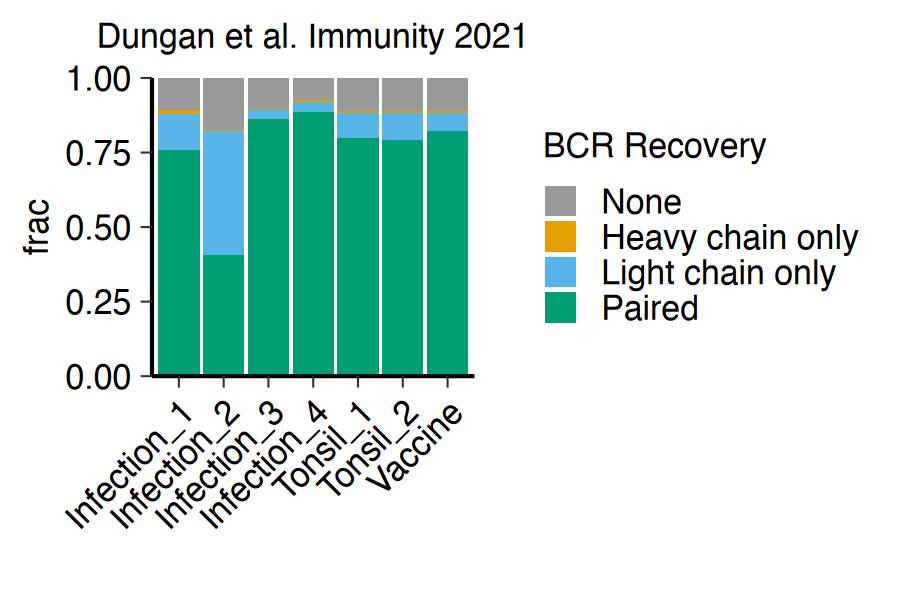

In [90]:
options(repr.plot.width=3,repr.plot.height=2,repr.plot.res=300)
metadata %>% 
ggplot(aes(x=orig.ident, fill=recovery)) + theme_classic()+
geom_bar(position='fill') + 
labs(x='',y='frac',fill='BCR Recovery',title='Dungan et al. Immunity 2021')+
scale_y_continuous(expand=c(0,0))+
scale_fill_manual(values = c("#999999", "#E69F00", "#56B4E9", "#009E73")) +
Axis_themes+
theme(axis.text.x=element_text(angle=45,hjust=1),
      legend.key.size = unit(.3, 'cm'))

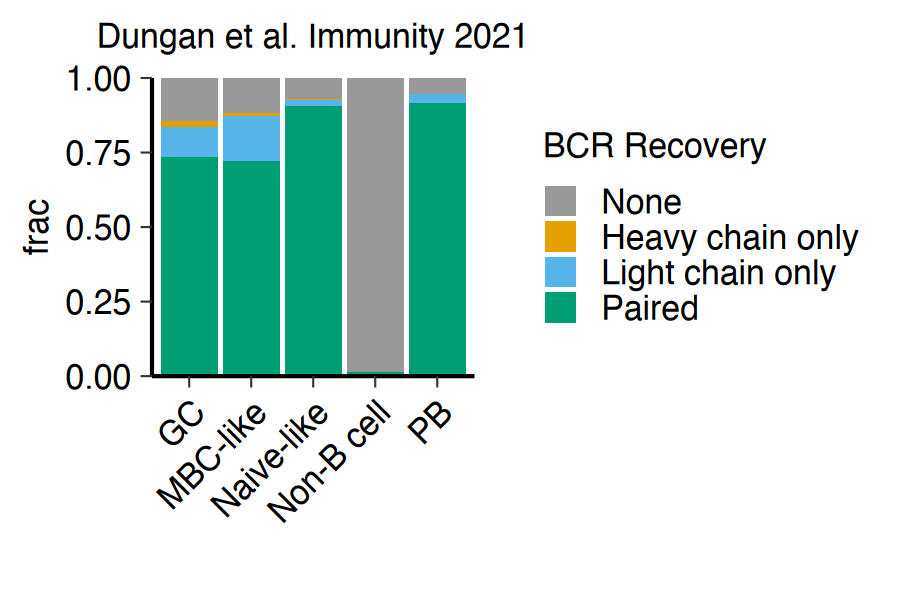

In [89]:
options(repr.plot.width=3,repr.plot.height=2,repr.plot.res=300)
metadata %>% 
ggplot(aes(x=cell.type, fill=recovery)) + theme_classic()+
geom_bar(position='fill') + 
labs(x='',y='frac',fill='BCR Recovery',title='Dungan et al. Immunity 2021')+
scale_y_continuous(expand=c(0,0))+
scale_fill_manual(values = c("#999999", "#E69F00", "#56B4E9", "#009E73")) +
Axis_themes+
theme(axis.text.x=element_text(angle=45,hjust=1),
      legend.key.size = unit(.3, 'cm'))

In [154]:
write.csv(metadata,'Zurbuchen_etal_metadata_recovery_labeled.csv')

In [91]:
table(gex@meta.data$recovery)


    IGH IGH+IGK IGH+IGL     IGK     IGL    None 
    129    9393    6285    1078     695    2132 

In [114]:
metadata=read.csv('Zurbuchen_etal_metadata_recovery_labeled.csv',row.names=1)
table(gex@meta.data$recovery)


    IGH IGH+IGK IGH+IGL     IGK     IGL    None 
    129    9393    6285    1078     695    2132 

In [132]:
metadata = gex@meta.data %>% mutate(none = ifelse(recovery=='None',1,0),
                               heavy = ifelse(grepl(pattern = 'IGH',recovery),1,0), 
                               light = ifelse(grepl(pattern = 'IGK|IGL',recovery),1,0),
                               paired = ifelse(grepl(pattern = '\\+',recovery),1,0)
                              )


In [133]:
none = metadata %>% count(orig.ident,cell.type,none) %>% #tidyr::complete(orig.ident,none,cell.type) %>% replace(is.na(.),0) %>% 
group_by(orig.ident,cell.type) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(none==1) 
heavy = metadata %>% count(orig.ident,cell.type,heavy) %>% #tidyr::complete(orig.ident,heavy,cell.type) %>% replace(is.na(.),0) %>% 
group_by(orig.ident,cell.type) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(heavy==1)
light = metadata %>% count(orig.ident,cell.type,light) %>% #tidyr::complete(orig.ident,light,cell.type) %>% replace(is.na(.),0) %>% 
group_by(orig.ident,cell.type) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(light==1)
paired = metadata %>% count(orig.ident,cell.type,paired) %>% #tidyr::complete(orig.ident,paired,cell.type) %>% replace(is.na(.),0) %>% 
group_by(orig.ident,cell.type) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(paired==1)

df1 = none %>% rename('recovery'='none') %>% mutate(recovery='None')
df2 = heavy %>% rename('recovery'='heavy') %>% mutate(recovery='Heavy')
df3 = light %>% rename('recovery'='light') %>% mutate(recovery='Light')
df4 = paired %>% rename('recovery'='paired') %>% mutate(recovery='Paired')
bcells = rbind( df1,df2, df3, df4) %>% filter(ncell>1)


In [134]:
# all bcell 
none = metadata %>% filter(cell.type!='Non-B cell') %>% count(orig.ident,none) %>% group_by(orig.ident) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(none==1) 
heavy = metadata %>% filter(cell.type!='Non-B cell') %>% count(orig.ident,heavy) %>% group_by(orig.ident) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(heavy==1)
light = metadata %>% filter(cell.type!='Non-B cell') %>% count(orig.ident,light) %>% group_by(orig.ident) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(light==1)
paired = metadata %>% filter(cell.type!='Non-B cell') %>% count(orig.ident,paired) %>% group_by(orig.ident) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(paired==1)

df1 = none %>% rename('recovery'='none') %>% mutate(recovery='None')
df2 = heavy %>% rename('recovery'='heavy') %>% mutate(recovery='Heavy')
df3 = light %>% rename('recovery'='light') %>% mutate(recovery='Light')
df4 = paired %>% rename('recovery'='paired') %>% mutate(recovery='Paired')
allbcell = rbind( df1,df2, df3, df4) %>% filter(ncell>1)
allbcell$cell.type = 'All B cells'

In [142]:
df4gg = rbind(bcells,allbcell) 
df4gg2 = df4gg %>% group_by(recovery,cell.type) %>% 
summarize(mean.frac= mean(frac),sd.frac=sd(frac),se.frac=sd.frac/sqrt(n()))

`summarise()` has grouped output by 'recovery'. You can override using the
`.groups` argument.


In [143]:
df4gg$recovery = factor(df4gg$recovery,levels=c('None','Heavy','Light','Paired'))
df4gg2$recovery = factor(df4gg2$recovery,levels=c('None','Heavy','Light','Paired'))

df4gg$cell.type = factor(df4gg$cell.type,levels=c('Non-B cell','Naive-like','MBC-like','GC','PB','All B cells'))
df4gg2$cell.type = factor(df4gg2$cell.type,levels=c('Non-B cell','Naive-like','MBC-like','GC','PB','All B cells'))

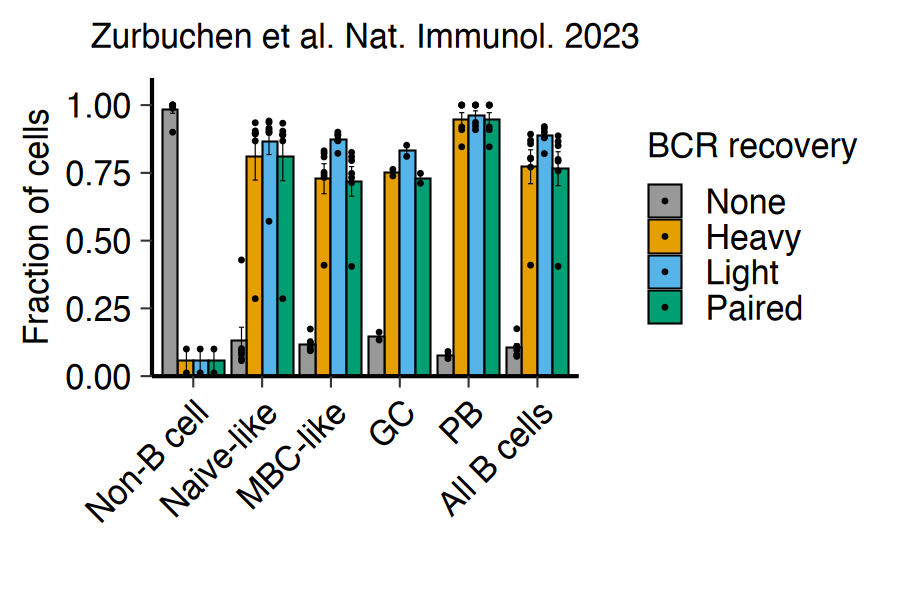

In [145]:
options(repr.plot.width=3,repr.plot.height=2,repr.plot.res=300)
dodgewidth=0.8
df4gg2 %>% 
ggplot(aes(x=cell.type,fill=recovery)) + theme_classic()+ 
geom_bar(aes(y=mean.frac),stat='identity', position='dodge', color = 'black', linewidth = .177) + 
geom_errorbar(aes(ymin = mean.frac-se.frac, ymax = mean.frac+se.frac),width=0.3,
              position = position_dodge(width = dodgewidth),linewidth=0.1)+
geom_point(data=df4gg, aes(x=cell.type, y=frac), size= .2, color = 'black',stroke=0.3,
           position = position_jitterdodge(dodge.width = dodgewidth, jitter.width = 0))+
#geom_jitter(aes(y=frac),size=0.5,position = position_dodge(width = 0.9)) + 
labs(title='Zurbuchen et al. Nat. Immunol. 2023',x='',y='Fraction of cells',fill='BCR recovery') + 
scale_fill_manual(values = c('None'="#999999", 'Heavy'="#E69F00", 'Light'="#56B4E9",'Paired'="#009E73")) +
scale_y_continuous(expand=c(0,0),lim=c(0,1.1)) + 
Axis_themes +
theme(axis.text.x=element_text(angle=45,hjust=1),
      legend.key.size = unit(.3, 'cm'))

out = 'figures/zurbuchen_celltype_bcr_recovery_barplot.pdf'
ggsave(out, height = 2, width = 3, useDingbats = FALSE)

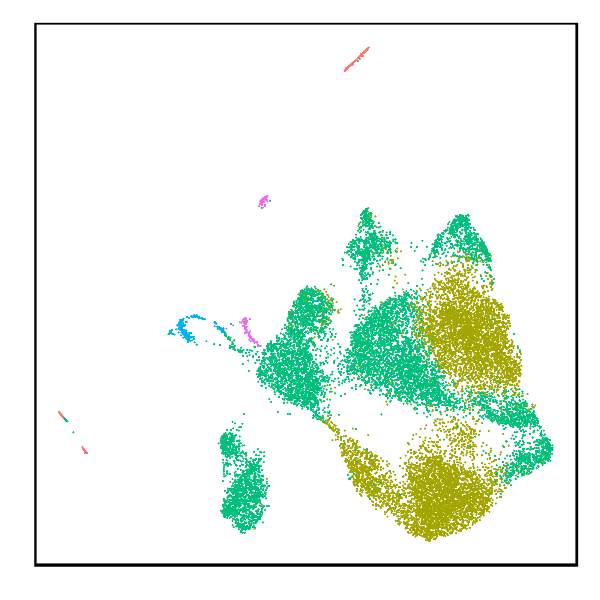

In [148]:
options(repr.plot.width=2,repr.plot.height=2,repr.plot.res=300)

metadata = read.csv('Zurbuchen_etal_metadata_recovery_labeled.csv',row.names=1)
metadata$cell.type = factor(metadata$cell.type,levels=c('Non-B cell','Naive-like','MBC-like','GC','PB'))

metadata %>% 
ggplot(aes(x=UMAP1, y=UMAP2,color=cell.type))+ 
geom_point_rast(size = .2, stroke = 0, raster.dpi = 1000) +
#scale_color_manual(values = c('#CCCCCB','#C8E3B4','#1D91C0','#1E2456')) +
labs(color='Cell Type') +
UMAP_theme

out = 'figures/zurbuchen_uamp_celltype.pdf'
ggsave(out, height = 1.8, width = 1.8, useDingbats = FALSE)

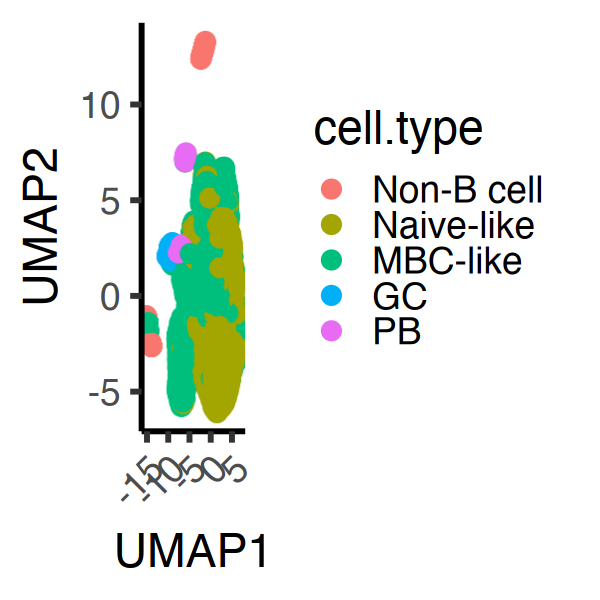

In [150]:
options(repr.plot.width=2,repr.plot.height=2,repr.plot.res=300)

metadata = read.csv('Zurbuchen_etal_metadata_recovery_labeled.csv',row.names=1)
metadata$cell.type = factor(metadata$cell.type,levels=c('Non-B cell','Naive-like','MBC-like','GC','PB'))

metadata %>% 
ggplot(aes(x=UMAP1, y=UMAP2,color=cell.type))+ theme_classic() +
geom_point_rast() + #guides(color = guide_legend(ncol = 2)) +
theme(axis.text.x=element_text(angle=45,hjust=1),
      legend.key.size = unit(.3, 'cm'))

out = 'figures/zurbuchen_uamp_celltype_legend.pdf'
ggsave(out, height = 1.8, width = 1.8, useDingbats = FALSE)

In [152]:
head(metadata)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_Hashing,nFeature_Hashing,Hashing_maxID,Hashing_secondID,Hashing_margin,Hashing_classification,Hashing_classification.global,⋯,cell_id,recovery,RNA_snn_res.0.1,RNA_snn_res.0.3,RNA_snn_res.0.5,RNA_snn_res.0.6,seurat_clusters,UMAP1,UMAP2,cell.type
,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<chr>
inf1_AAACCTGAGCGATTCT-1,Infection_1,3862,940,1183,7,CD21,CXCR5.1,2.236932,CD21,Singlet,⋯,inf1_AAACCTGAGCGATTCT-1,IGK,0,5,4,4,4,5.8742917,-1.4612930,MBC-like
inf1_AAAGATGAGTGGACGT-1,Infection_1,4670,1494,813,7,CD21,CD27.1,1.004236,CD21,Singlet,⋯,inf1_AAAGATGAGTGGACGT-1,IGH+IGK,0,5,4,4,4,4.3816555,-1.1630663,MBC-like
inf1_AAAGATGGTGATGATA-1,Infection_1,5641,1413,1646,7,CD21,CXCR5.1,3.234560,CD21,Singlet,⋯,inf1_AAAGATGGTGATGATA-1,IGH+IGL,0,5,4,4,4,3.0918508,-0.7879575,MBC-like
inf1_AAAGCAAAGTGGTAGC-1,Infection_1,3118,890,662,7,CD21,CD27.1,1.329209,CD21,Singlet,⋯,inf1_AAAGCAAAGTGGTAGC-1,IGH+IGK,0,5,4,4,4,5.7979043,-0.7503211,MBC-like
inf1_AAAGCAATCGCCTGAG-1,Infection_1,5014,1543,541,7,CD21,CD27.1,1.858666,CD21,Singlet,⋯,inf1_AAAGCAATCGCCTGAG-1,IGL,0,5,4,4,4,0.5208266,2.6014350,MBC-like
inf1_AAAGTAGCACCTTGTC-1,Infection_1,3741,1138,767,7,CD21,CXCR5.1,1.502647,CD21,Singlet,⋯,inf1_AAAGTAGCACCTTGTC-1,IGH+IGK,1,1,1,1,1,1.7051046,-2.2107131,Naive-like


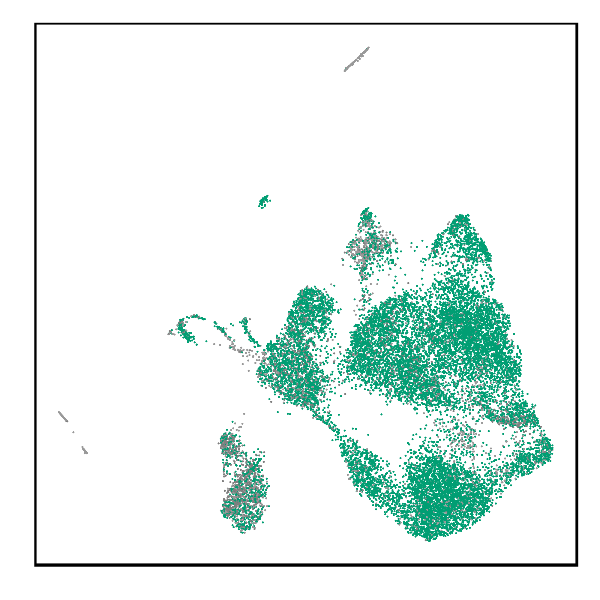

In [155]:
options(repr.plot.width=2,repr.plot.height=2,repr.plot.res=300)

metadata = read.csv('Zurbuchen_etal_metadata_recovery_labeled.csv',row.names=1)

metadata %>% 
ggplot(aes(x=UMAP1, y=UMAP2,color=recovery))+ 
geom_point_rast(size = .2, stroke = 0, raster.dpi = 1000) +
scale_color_manual(values = c('None'="#999999", 'Heavy'="#E69F00", 'Light'="#56B4E9",'Paired'="#009E73")) +
labs(color='Cell Type') +
UMAP_theme

out = 'figures/zurbuchen_uamp_recovery.pdf'
ggsave(out, height = 1.8, width = 1.8, useDingbats = FALSE)

In [5]:
gex=readRDS('zurbuchen_etal_combined_with_VDJ_300.RDS')

In [6]:
# get WTA and BCR counts 
bcell = subset(gex,cell.type!='Non-B cell')
bcell

An object of class Seurat 
36638 features across 19486 samples within 2 assays 
Active assay: RNA (36601 features, 2000 variable features)
 15 layers present: counts.Infection_1, counts.Infection_2, counts.Infection_3, counts.Infection_4, counts.Tonsil_1, counts.Tonsil_2, counts.Vaccine, data.Infection_1, data.Infection_2, data.Infection_3, data.Infection_4, data.Tonsil_1, data.Tonsil_2, data.Vaccine, scale.data
 1 other assay present: Hashing
 2 dimensional reductions calculated: pca, umap

In [12]:
# important step 
filter.bcr = vdj.all%>% filter(cell_id %in% keep$cell_id)

In [13]:
# get WTA and BCR counts 
DefaultAssay(bcell) <- "RNA"
# IGH
df4gg = FetchData(bcell,jz.checkgenes(bcell,'IGH'),slot='count')
df4gg$WTA = rowSums(df4gg)
# get scVDJ umis
bcr.df = filter.bcr %>% filter(duplicate_count>0,isotype=='IGH')
df4gg$VDJ = bcr.df$duplicate_count[match(rownames(df4gg), bcr.df$cell_id)]
df4gg$VDJ[is.na(df4gg$VDJ)] = 0
igh = df4gg %>% select(WTA, VDJ) %>% mutate(chain = 'IGH')

# IGK
df4gg = FetchData(bcell,jz.checkgenes(bcell,'IGK'),slot='count')
df4gg$WTA = rowSums(df4gg)
# get scVDJ umis
bcr.df = filter.bcr %>% filter(duplicate_count>0,isotype=='IGK')
df4gg$VDJ = bcr.df$duplicate_count[match(rownames(df4gg), bcr.df$cell_id)]
df4gg$VDJ[is.na(df4gg$VDJ)] = 0
igk = df4gg %>% select(WTA, VDJ) %>% mutate(chain = 'IGK')

# IGL
df4gg = FetchData(bcell,jz.checkgenes(bcell,'IGL'),slot='count')
df4gg$WTA = rowSums(df4gg)
# get scVDJ umis
bcr.df = filter.bcr %>% filter(duplicate_count>0,isotype=='IGL')
df4gg$VDJ = bcr.df$duplicate_count[match(rownames(df4gg), bcr.df$cell_id)]
df4gg$VDJ[is.na(df4gg$VDJ)] = 0
igl = df4gg %>% select(WTA, VDJ) %>% mutate(chain = 'IGL')

Warning message:
“The `slot` argument of `FetchData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.”


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message in geom_abline(slope = 1, yintercept = 0, linetype = "dashed", color = "red", :
“Ignoring unknown parameters: `yintercept`”
Warning message in geom_abline(slope = 1, yintercept = 0, linetype = "dashed", color = "red", :
“Ignoring unknown parameters: `yintercept`”
Warning message in geom_abline(slope = 1, yintercept = 0, linetype = "dashed", color = "red", :
“Ignoring unknown parameters: `yintercept`”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in sc

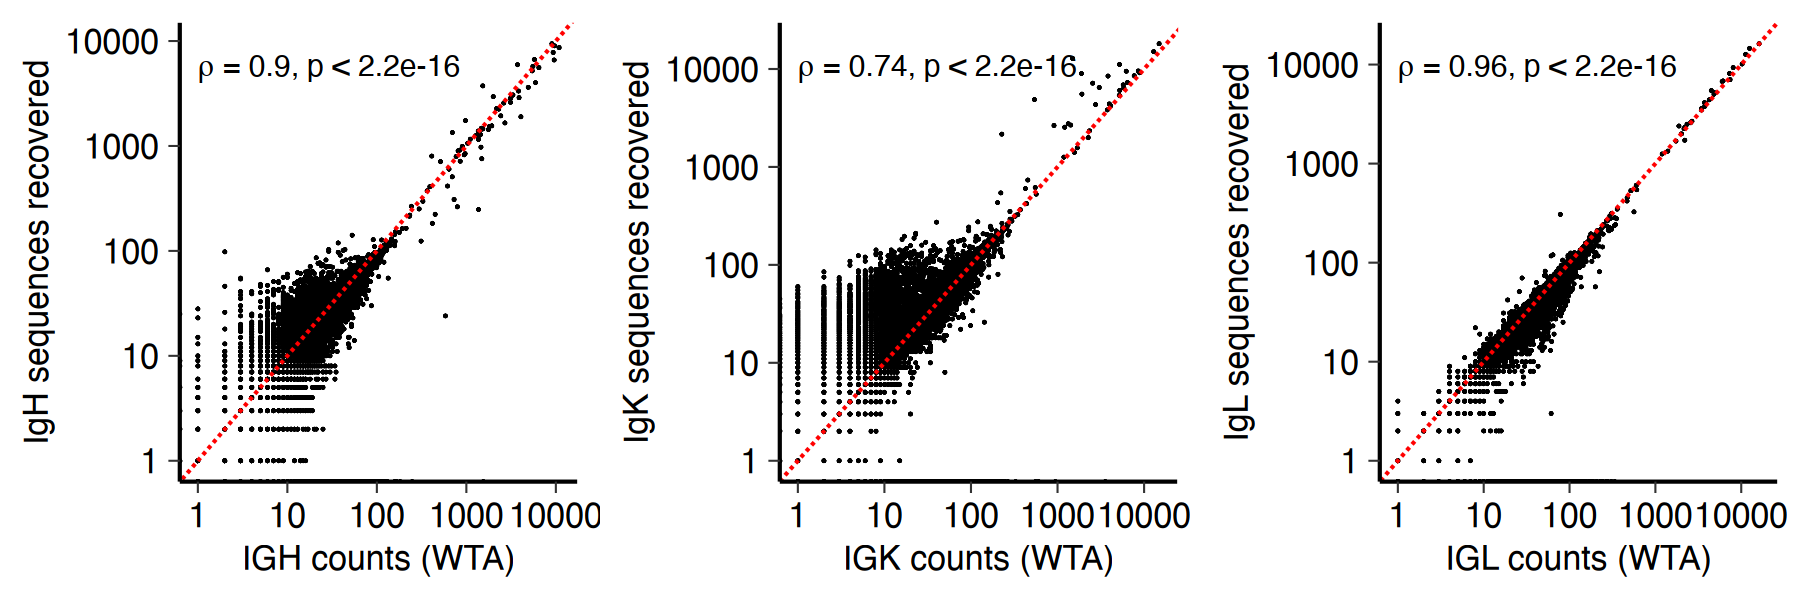

In [159]:
options(repr.plot.width = 6, repr.plot.height = 2, repr.plot.res = 300)

library(ggpubr)
g1 = ggplot(igh, aes(x = WTA, y = VDJ)) + geom_point_rast(size = .4, stroke = 0.1, raster.dpi = 1000) + scale_x_log10() + scale_y_log10() + geom_abline(slope = 1, yintercept = 0, linetype = 'dashed', color = 'red', size = .355) + 
theme_classic() + Axis_themes + labs(x = 'IGH counts (WTA)', y  = 'IgH sequences recovered') + stat_cor(data = igh %>% filter(WTA>1,VDJ>1),aes(x=WTA,y=VDJ),method = 'spearman', size = 2.5, cor.coef.name = 'rho')
g1$layers[[2]]$aes_params$textsize <- 3

g2 = ggplot(igk, aes(x = WTA, y = VDJ)) + geom_point_rast(size = .4, stroke = 0.1, raster.dpi = 1000) + scale_x_log10() + scale_y_log10() + geom_abline(slope = 1, yintercept = 0, linetype = 'dashed', color = 'red', size = .355) + 
theme_classic() + Axis_themes  + labs(x = 'IGK counts (WTA)', y  = 'IgK sequences recovered') + stat_cor(data = igk %>% filter(WTA>1,VDJ>1),aes(x=WTA,y=VDJ),method = 'spearman', size = 2.5, cor.coef.name = 'rho')
g2$layers[[2]]$aes_params$textsize <- 3

g3 = ggplot(igl, aes(x = WTA, y = VDJ)) + geom_point_rast(size = .4, stroke = 0.1, raster.dpi = 1000) + scale_x_log10() + scale_y_log10() + geom_abline(slope = 1, yintercept = 0, linetype = 'dashed', color = 'red', size = .355) + 
theme_classic() + Axis_themes  + labs(x = 'IGL counts (WTA)', y  = 'IgL sequences recovered') + stat_cor(data = igl %>% filter(WTA>1,VDJ>1),aes(x=WTA,y=VDJ),method = 'spearman', size = 2.5, cor.coef.name = 'rho')
g3$layers[[2]]$aes_params$textsize <- 3


cowplot::plot_grid(g1, g2, g3, ncol = 3)
# out = 'figures/10x_3p_corplots.pdf'
# ggsave(out,device='pdf', width = 6.7, height = 6.8/3,
#        dpi = 300,useDingbats = FALSE)

In [14]:
out.df = rbind(igh,igk,igl) %>% 
mutate(exp=str_split_i(rownames(.),'_',1),
       project='10x 5`GEX - Zurbuchen et al. 2023')
head(out.df)

,WTA,VDJ,chain,exp,project
,<dbl>,<dbl>,<chr>,<chr>,<chr>
inf1_AAACCTGAGCGATTCT-1,2,0,IGH,inf1,10x 5`GEX - Zurbuchen et al. 2023
inf1_AAAGATGAGTGGACGT-1,10,10,IGH,inf1,10x 5`GEX - Zurbuchen et al. 2023
inf1_AAAGATGGTGATGATA-1,7,3,IGH,inf1,10x 5`GEX - Zurbuchen et al. 2023
inf1_AAAGCAAAGTGGTAGC-1,7,6,IGH,inf1,10x 5`GEX - Zurbuchen et al. 2023
inf1_AAAGCAATCGCCTGAG-1,7,0,IGH,inf1,10x 5`GEX - Zurbuchen et al. 2023
inf1_AAAGTAGCACCTTGTC-1,19,17,IGH,inf1,10x 5`GEX - Zurbuchen et al. 2023


In [15]:
write.csv(out.df,'Zurbuchen_etal_cDNA_vs_VDJ.csv')

In [162]:
# recovery probability plot 
df4gg = read.csv('Zurbuchen_etal_cDNA_vs_VDJ.csv',row.names=1)
df4gg = df4gg %>% mutate(chain=ifelse(chain == 'IGH', 'Heavy Chain', 'Light Chain')) %>%
mutate(Recovery = ifelse(VDJ>0, 'Recovery', 'No Recovery'))

## Binning the WTA counts
df4gg$WTA.bin = cut(df4gg$WTA, c(-Inf,0,2,4,8,16,32,64,Inf)) 
# calculate fraction of recovery / no recovery 
df4gg = df4gg %>%
group_by(chain, project, exp, WTA.bin, Recovery) %>% summarise(n=n()) %>% 
group_by(chain, project, exp, WTA.bin) %>% mutate(frac = n/sum(n))

# calculate mean for recovered 
df4gg = df4gg %>% filter(Recovery == 'Recovery') %>% 
group_by(chain,project,WTA.bin) %>% 
summarise(mean.frac = mean(frac), std = sd(frac), se = std/sqrt(n())) %>% ungroup()

`summarise()` has grouped output by 'chain', 'project', 'exp', 'WTA.bin'. You
can override using the `.groups` argument.
`summarise()` has grouped output by 'chain', 'project'. You can override using
the `.groups` argument.


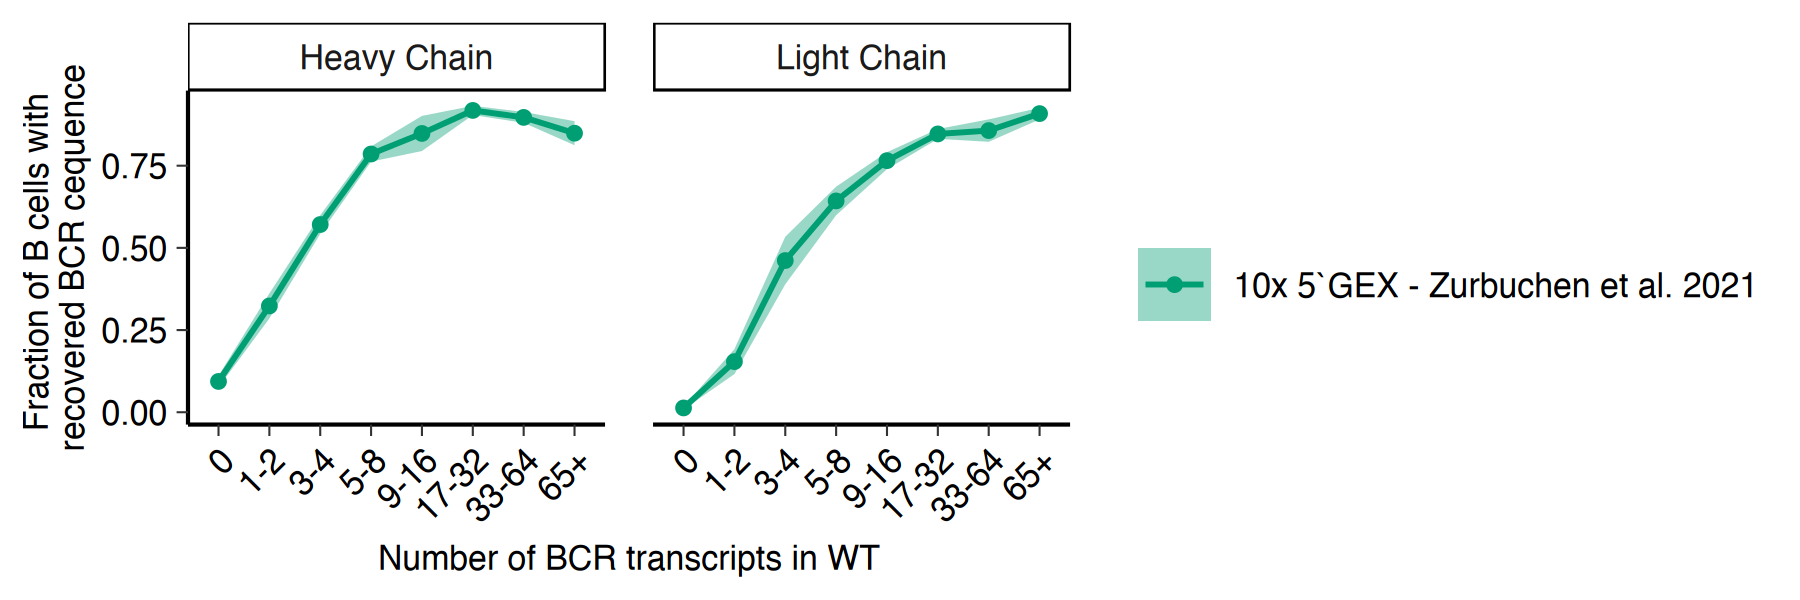

In [163]:
options(repr.plot.width=6, repr.plot.height=2, repr.plot.res=300)
col = c("#009E73", "#0072B2", "#999999", "#CC79A7" ,"#D55E00")#E69F00

df4gg %>% 
ggplot(aes(x=WTA.bin, y=mean.frac,color=project)) + theme_classic() +
geom_ribbon(aes(group=project,ymin=mean.frac-se, ymax=mean.frac+se, fill=project), linewidth=0, alpha=0.4)+
geom_line(aes(group=project),linewidth=0.5) +
geom_point(size=1) + 
scale_color_manual(values=col) +
scale_fill_manual(values=col) +
scale_x_discrete(labels=c('0','1-2','3-4','5-8','9-16','17-32','33-64','65+'))+ 
facet_wrap('chain') + 
labs(y='Fraction of B cells with \nrecovered BCR cequence', 
     x='Number of BCR transcripts in WT',color='', fill='')+
Axis_themes+
theme(panel.spacing = unit(0.8, "lines"),
      axis.text.x=element_text(angle=45,hjust=1,color = "black"))



# Play Ground 

In [122]:
# Assays for Baiting constructs, Protein quantification and hashing are created
Baiting_assay <- CreateAssayObject(counts = MBC_dataset$`Antibody Capture`[c(9:15),])
Protein_assay <- CreateAssayObject(counts = MBC_dataset$`Antibody Capture`[c(16:21),])
Hashing_assay <- CreateAssayObject(counts = MBC_dataset$`Antibody Capture`[c(1:8),])

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [123]:
# Now the assays are added to the previously created Seurat object
MBC[["Baiting"]] <- Baiting_assay
MBC[["Protein"]] <- Protein_assay
MBC[["Hashing"]] <- Hashing_assay

0%      5%     10%     15%     20%     25%     30%     35%     40%     45% 
  70.00  591.55  863.00 1005.65 1098.20 1172.00 1232.30 1294.85 1345.00 1395.00 
    50%     55%     60%     65%     70%     75%     80%     85%     90%     95% 
1446.50 1504.00 1562.00 1631.00 1723.00 1841.25 1985.60 2188.05 2427.90 2843.00 
   100% 
6372.00

0%          5%         10%         15%         20%         25% 
 0.01011429  0.82899965  1.10636016  1.28809457  1.45046064  1.60642570 
        30%         35%         40%         45%         50%         55% 
 1.74002146  1.87509671  2.00454041  2.13362873  2.27402645  2.42483227 
        60%         65%         70%         75%         80%         85% 
 2.58433947  2.75442252  2.97422590  3.23953675  3.59908545  4.22201532 
        90%         95%        100% 
 5.87543695  9.88904507 89.61424332

[1] 0.9436163

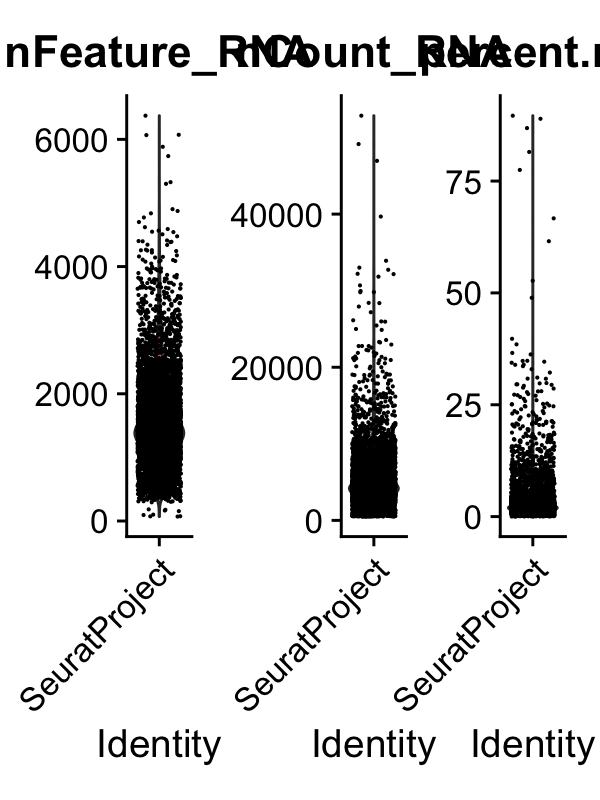

In [124]:
# QC and selecting cells for further analysis 
MBC[["percent.mt"]] <- PercentageFeatureSet(MBC, pattern = "^MT-")
VlnPlot(MBC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
quantile(MBC@meta.data$nFeature_RNA,probs = seq(0, 1, 1/20))
quantile(MBC@meta.data$percent.mt,probs = seq(0, 1, 1/20))
nrow(MBC@meta.data[MBC@meta.data$percent.mt < 10 &
                     MBC@meta.data$nFeature_RNA > 200 &
                     MBC@meta.data$nFeature_RNA < 4000,])/nrow(MBC@meta.data)

MBC <- subset(MBC, subset = nFeature_RNA > 200 & percent.mt < 20)

In [125]:
# Demultiplexing the HTO data
MBC <- NormalizeData(MBC, assay = "Hashing", normalization.method = "CLR", margin = 2)
MBC <- HTODemux(MBC, assay = "Hashing", positive.quantile = 0.99)
table(MBC@meta.data$Hashing_classification.global)
MBC <- subset(MBC, subset = Hashing_classification.global=="Singlet")
# RidgePlot(MBC, assay = "Hashing", features = rownames(MBC[["Hashing"]])[1:10], ncol = 2)
table(MBC@meta.data$Hashing_classification)

Normalizing across cells

Cutoff for Patient-1-Post-2nd-Vacc : 48 reads

Cutoff for Patient-1-6M-post-vaccination : 121 reads

Cutoff for Patient-1-Post-Boost : 224 reads

Cutoff for Patient-1-Post-Reinfection : 163 reads

Cutoff for Patient-2-Post-2nd-Vacc : 289 reads

Cutoff for Patient-2-6M-post-vaccination : 394 reads

Cutoff for Patient-2-Post-Boost : 461 reads

Cutoff for Patient-2-Post-Reinfection : 140 reads




 Doublet Negative  Singlet 
     874       34     5175 


Patient-1-6M-post-vaccination       Patient-1-Post-2nd-Vacc 
                          626                           411 
         Patient-1-Post-Boost    Patient-1-Post-Reinfection 
                          740                           686 
Patient-2-6M-post-vaccination       Patient-2-Post-2nd-Vacc 
                          555                           579 
         Patient-2-Post-Boost    Patient-2-Post-Reinfection 
                          838                           740 

In [126]:
# Introducing metadata columns
MBC@meta.data$Patient <- "Patient 1"
MBC@meta.data$Patient[grep("Patient-2",MBC@meta.data$hash.ID)] <- "Patient 2"
MBC@meta.data$Timepoint <- "6M post 2nd vacc"
MBC@meta.data$Timepoint[grep("Post-2nd",MBC@meta.data$hash.ID)] <- "Post 2nd vacc"
MBC@meta.data$Timepoint[grep("Post-Boost",MBC@meta.data$hash.ID)] <- "Post boost vacc"
MBC@meta.data$Timepoint[grep("Post-Reinfection",MBC@meta.data$hash.ID)] <- "Post reinfection"

In [127]:
table(MBC$Patient,MBC$Timepoint)

           
            6M post 2nd vacc Post 2nd vacc Post boost vacc Post reinfection
  Patient 1              626           411             740              686
  Patient 2              555           579             838              740

In [128]:
saveRDS(MBC,'vaccine_cohort.RDS')

In [129]:
# read in VDJ files 
vdj = read.csv('airr_rearrangement.tsv',sep='\t')


In [130]:
# add isotype 
vdj = vdj %>% mutate(isotype=str_sub(v_call,1,3)) 

In [131]:
colnames(vdj)

[1] "cell_id"            "clone_id"           "sequence_id"       
 [4] "sequence"           "sequence_aa"        "productive"        
 [7] "rev_comp"           "v_call"             "v_cigar"           
[10] "d_call"             "d_cigar"            "j_call"            
[13] "j_cigar"            "c_call"             "c_cigar"           
[16] "sequence_alignment" "germline_alignment" "junction"          
[19] "junction_aa"        "junction_length"    "junction_aa_length"
[22] "v_sequence_start"   "v_sequence_end"     "d_sequence_start"  
[25] "d_sequence_end"     "j_sequence_start"   "j_sequence_end"    
[28] "c_sequence_start"   "c_sequence_end"     "consensus_count"   
[31] "duplicate_count"    "is_cell"            "isotype"

In [132]:
length(unique(vdj$cell_id))
table(vdj$is_cell,vdj$productive)

[1] 5427

      
        TRUE
  TRUE 11288

In [133]:
summary(vdj$junction_aa_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   11.00   13.00   14.36   17.00   34.00 

In [134]:
# filtering VDJ files 
pairing = vdj %>% count(cell_id,isotype) %>% group_by(cell_id) %>% summarise(pair=paste(isotype,collapse='+'),n=sum(n)) 
dim(pairing)
head(pairing,2)
keep = pairing %>% filter(n<=2,nchar(pair)<=7)
dim(keep)
head(keep,2)


[1] 5427    3

cell_id,pair,n
<chr>,<chr>,<int>
AAACCTGAGCCACTAT-1,IGH+IGK,2
AAACCTGAGGAATTAC-1,IGH+IGL,2


[1] 4868    3

cell_id,pair,n
<chr>,<chr>,<int>
AAACCTGAGCCACTAT-1,IGH+IGK,2
AAACCTGAGGAATTAC-1,IGH+IGL,2


In [135]:
# add vdj info to MBC 

In [136]:
MBC$cell_id = rownames(MBC@meta.data)
MBC$recovery = keep$pair[match(MBC$cell_id,keep$cell_id)]
MBC$recovery[is.na(MBC$recovery)] = 'NONE'

In [137]:
table(MBC$recovery)


    IGH IGH+IGK IGH+IGL     IGK     IGL    NONE 
     37    2526    1615     205     127     665 

In [138]:
colnames(MBC@meta.data)

[1] "orig.ident"                    "nCount_RNA"                   
 [3] "nFeature_RNA"                  "nCount_Baiting"               
 [5] "nFeature_Baiting"              "nCount_Protein"               
 [7] "nFeature_Protein"              "nCount_Hashing"               
 [9] "nFeature_Hashing"              "percent.mt"                   
[11] "Hashing_maxID"                 "Hashing_secondID"             
[13] "Hashing_margin"                "Hashing_classification"       
[15] "Hashing_classification.global" "hash.ID"                      
[17] "Patient"                       "Timepoint"                    
[19] "cell_id"                       "recovery"

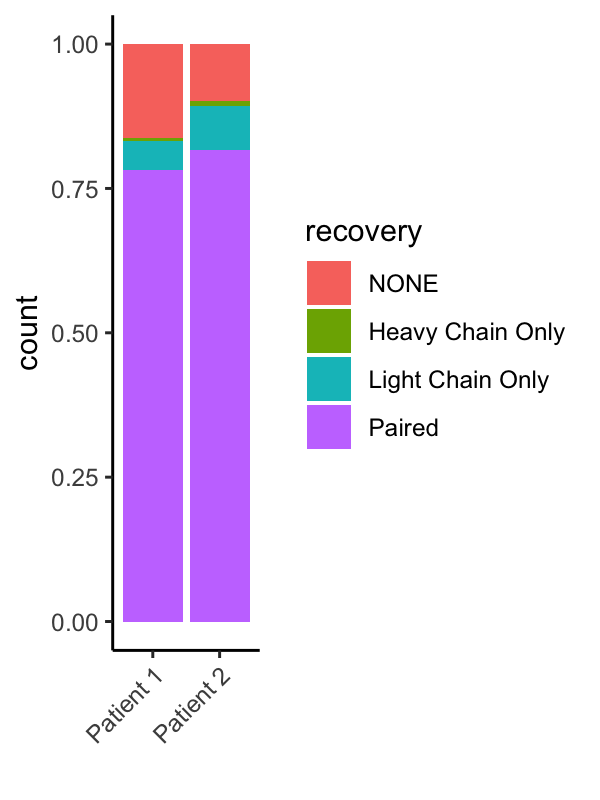

In [140]:
metadata=MBC@meta.data
metadata$recovery[nchar(metadata$recovery)==7] = 'Paired'
metadata$recovery[metadata$recovery %in% c('IGK','IGL')] = 'Light Chain Only'
metadata$recovery[metadata$recovery %in% c('IGH')] = 'Heavy Chain Only'
metadata$recovery = factor(metadata$recovery,levels=c('NONE','Heavy Chain Only','Light Chain Only','Paired'))

options(repr.plot.width=3,repr.plot.height=4,repr.plot.res=200)
metadata %>% 
ggplot(aes(x=Patient, fill=recovery)) + theme_classic()+
geom_bar(position='fill') + 
labs(x='')+
theme(axis.text.x=element_text(angle=45,hjust=1))